<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
        Imports
    </p>
</div>

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rich.pretty import pprint
from rich import print
from scipy.constants import point

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Notebook settings
    </p>
</div>

In [3]:
### Scanpy settings 
sc.logging.print_versions()
sc.settings.verbosity = 3
plt.rcParams.update({
    'font.size': 12,  # Default font size for all text
    'axes.titlesize': 8,  # Title font size
    'axes.labelsize': 8,  # Axis label font size
    'xtick.labelsize': 8,  # X-axis tick label font size
    'ytick.labelsize': 8,  # Y-axis tick label font size
    'legend.fontsize': 8  # Legend font size
})

-----
anndata     0.10.9
scanpy      1.10.3
-----
PIL                         10.3.0
anyio                       NA
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
bottleneck                  1.3.7
brotli                      1.0.9
certifi                     2024.08.30
cffi                        1.16.0
chardet                     4.0.0
charset_normalizer          2.0.4
cloudpickle                 2.2.1
colorama                    0.4.6
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.2
dask                        2024.5.0
dateutil                    2.9.0.post0
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
executing                   0.8.3
fastjsonschema              NA
google                    

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
        Load the dataset
    </p>
</div>

In [5]:
adata = sc.read_visium('data/human_brain_cancer')

### view the data shape 
adata

reading data\human_brain_cancer\filtered_feature_bc_matrix.h5


C:\Users\alawo\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


C:\Users\alawo\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 10878 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

Make variable names unique

In [7]:
adata.var_names_make_unique()

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
        identify mitochondrial and ribosomal genes
    </p>
</div>

In [9]:
### get the mitochondrial genes marked in the data
adata.var['mt'] = adata.var.index.str.startswith('MT')
adata.var

gene_ids    feature_types  genome     mt
SAMD11   ENSG00000187634  Gene Expression  GRCh38  False
NOC2L    ENSG00000188976  Gene Expression  GRCh38  False
KLHL17   ENSG00000187961  Gene Expression  GRCh38  False
PLEKHN1  ENSG00000187583  Gene Expression  GRCh38  False
PERM1    ENSG00000187642  Gene Expression  GRCh38  False
...                  ...              ...     ...    ...
MT-ND4L  ENSG00000212907  Gene Expression  GRCh38   True
MT-ND4   ENSG00000198886  Gene Expression  GRCh38   True
MT-ND5   ENSG00000198786  Gene Expression  GRCh38   True
MT-ND6   ENSG00000198695  Gene Expression  GRCh38   True
MT-CYB   ENSG00000198727  Gene Expression  GRCh38   True

[18085 rows x 4 columns]

In [10]:
### Get the list of ribosomal genes  
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)

### see the list of ribosomal genes  
pprint(ribo_genes[0].values)

### make column for ribo genes  
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

### view the data  
adata.var['ribo'].value_counts()

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
│      'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
│      'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
│      'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
│      'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
│      'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
│      'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
│      'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
│      'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
│      'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
│      'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
│      'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
│      'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

ribo
False    18083
True         2
Name: count, dtype: int64

In [11]:
### calculate the qc metrics 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], inplace=True)
pprint(adata)
adata.var

AnnData object with n_obs × n_vars = 10878 × 18085
│   obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
│   var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
│   uns: 'spatial'
│   obsm: 'spatial'

gene_ids    feature_types  genome     mt   ribo  \
SAMD11   ENSG00000187634  Gene Expression  GRCh38  False  False   
NOC2L    ENSG00000188976  Gene Expression  GRCh38  False  False   
KLHL17   ENSG00000187961  Gene Expression  GRCh38  False  False   
PLEKHN1  ENSG00000187583  Gene Expression  GRCh38  False  False   
PERM1    ENSG00000187642  Gene Expression  GRCh38  False  False   
...                  ...              ...     ...    ...    ...   
MT-ND4L  ENSG00000212907  Gene Expression  GRCh38   True  False   
MT-ND4   ENSG00000198886  Gene Expression  GRCh38   True  False   
MT-ND5   ENSG00000198786  Gene Expression  GRCh38   True  False   
MT-ND6   ENSG00000198695  Gene Expression  GRCh38   True  False   
MT-CYB   ENSG00000198727  Gene Expression  GRCh38   True  False   

         n_cells_by_counts  mean_counts  log1p_mean_counts  \
SAMD11                 981     0.106270           0.100994   
NOC2L                 3449     0.482442           0.393690   
KLHL17                1472     0.153613           0.142899   
PLEKHN1                631     0.061776           0.059943   
PERM1                  668     0.064994           0.062969   
...                    ...          ...                ...   
MT-ND4L              10857    59.427559           4.101445   
MT-ND4               10865    65.193512           4.192583   
MT-ND5               10855    29.240852           3.409194   
MT-ND6               10841    17.671263           2.926986   
MT-CYB               10862    53.783508           4.003389   

         pct_dropout_by_counts  total_counts  log1p_total_counts  
SAMD11               90.981798        1156.0            7.053586  
NOC2L                68.293804        5248.0            8.565793  
KLHL17               86.468101        1671.0            7.421776  
PLEKHN1              94.199301         672.0            6.511745  
PERM1                93.859165         707.0            6.562444  
...                        ...           ...                 ...  
MT-ND4L               0.193050      646453.0           13.379257  
MT-ND4                0.119507      709175.0           13.471859  
MT-ND5                0.211436      318082.0           12.670068  
MT-ND6                0.340136      192228.0           12.166443  
MT-CYB                0.147086      585057.0           13.279467  

[18085 rows x 11 columns]

In [12]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AACAATCCGAGTGGAC-1          1        103         47               7397   
AACAATGTGCTCCGAG-1          1         98        158               8213   
AACAATTATCTGCGCC-1          1         37        219                938   
AACACCAGCCTACTCG-1          1         31         39               2732   
AACACCATTCGCATAC-1          1         53        139               5467   
...                       ...        ...        ...                ...   
TGTTGGCCTGTAGCGG-1          1         40         78               1472   
TGTTGGTGATTAGGTA-1          1        108         22               2117   
TGTTGGTGCGCACGAG-1          1         24        108              10113   
TGTTGGTGCGCTTCGC-1          1         37        127               2554   
TGTTGGTGCGGAATCA-1          1         83         87               6642   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AACAATCCGAGTGGAC-1                 8.908965       21825.0            9.990857   
AACAATGTGCTCCGAG-1                 9.013595       30028.0           10.309918   
AACAATTATCTGCGCC-1                 6.844815        1210.0            7.099202   
AACACCAGCCTACTCG-1                 7.913155        3241.0            8.083945   
AACACCATTCGCATAC-1                 8.606668       11178.0            9.321793   
...                                     ...           ...                 ...   
TGTTGGCCTGTAGCGG-1                 7.295056        1711.0            7.445417   
TGTTGGTGATTAGGTA-1                 7.658228        2843.0            7.952967   
TGTTGGTGCGCACGAG-1                 9.221676       43324.0           10.676485   
TGTTGGTGCGCTTCGC-1                 7.845808        3456.0            8.148156   
TGTTGGTGCGGAATCA-1                 8.801319       17251.0            9.755683   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AACAATCCGAGTGGAC-1                   15.647194                    20.577320   
AACAATGTGCTCCGAG-1                   11.412681                    16.348075   
AACAATTATCTGCGCC-1                   21.735537                    30.000000   
AACACCAGCCTACTCG-1                   10.305461                    13.390929   
AACACCATTCGCATAC-1                   16.970836                    21.291823   
...                                        ...                          ...   
TGTTGGCCTGTAGCGG-1                   13.909994                    19.754530   
TGTTGGTGATTAGGTA-1                   17.235315                    21.772775   
TGTTGGTGCGCACGAG-1                   13.158988                    17.147539   
TGTTGGTGCGCTTCGC-1                   18.923611                    22.685185   
TGTTGGTGCGGAATCA-1                   17.883021                    22.526230   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AACAATCCGAGTGGAC-1                    26.666667                    37.970218   
AACAATGTGCTCCGAG-1                    22.911949                    34.977354   
AACAATTATCTGCGCC-1                    39.008264                    63.801653   
AACACCAGCCTACTCG-1                    19.561864                    31.132367   
AACACCATTCGCATAC-1                    26.632671                    37.645375   
...                                         ...                          ...   
TGTTGGCCTGTAGCGG-1                    25.657510                    43.191116   
TGTTGGTGATTAGGTA-1                    28.807598                    43.123461   
TGTTGGTGCGCACGAG-1                    22.433293                    32.455452   
TGTTGGTGCGCTTCGC-1                    28.472222                    40.567130   
TGTTGGTGCGGAATCA-1                    28.247638                    39.354240   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AACAATCCGAGTGGAC-1            547.0               6.306275       2.506300   
AACAATGTGCTCCGAG-1           1306.0               7.175490       4.349274   
AACAATTATCTGCGCC-

In [13]:
### sort by the counts of cells 
adata.var.sort_values('n_cells_by_counts')

gene_ids    feature_types  genome     mt   ribo  \
HNRNPCL3  ENSG00000277058  Gene Expression  GRCh38  False  False   
PRH2      ENSG00000134551  Gene Expression  GRCh38  False  False   
LRRC70    ENSG00000186105  Gene Expression  GRCh38  False  False   
PAGE2     ENSG00000234068  Gene Expression  GRCh38  False  False   
ASZ1      ENSG00000154438  Gene Expression  GRCh38  False  False   
...                   ...              ...     ...    ...    ...   
MT-CO2    ENSG00000198712  Gene Expression  GRCh38   True  False   
MT-CYB    ENSG00000198727  Gene Expression  GRCh38   True  False   
MT-ATP6   ENSG00000198899  Gene Expression  GRCh38   True  False   
MT-CO3    ENSG00000198938  Gene Expression  GRCh38   True  False   
MT-ND4    ENSG00000198886  Gene Expression  GRCh38   True  False   

          n_cells_by_counts  mean_counts  log1p_mean_counts  \
HNRNPCL3                  0     0.000000           0.000000   
PRH2                      0     0.000000           0.000000   
LRRC70                    0     0.000000           0.000000   
PAGE2                     0     0.000000           0.000000   
ASZ1                      0     0.000000           0.000000   
...                     ...          ...                ...   
MT-CO2                10859    65.269348           4.193727   
MT-CYB                10862    53.783508           4.003389   
MT-ATP6               10863    82.297668           4.422421   
MT-CO3                10864    97.653427           4.591613   
MT-ND4                10865    65.193512           4.192583   

          pct_dropout_by_counts  total_counts  log1p_total_counts  
HNRNPCL3             100.000000           0.0            0.000000  
PRH2                 100.000000           0.0            0.000000  
LRRC70               100.000000           0.0            0.000000  
PAGE2                100.000000           0.0            0.000000  
ASZ1                 100.000000           0.0            0.000000  
...                         ...           ...                 ...  
MT-CO2                 0.174664      710000.0           13.473022  
MT-CYB                 0.147086      585057.0           13.279467  
MT-ATP6                0.137893      895234.0           13.704842  
MT-CO3                 0.128700     1062274.0           13.875923  
MT-ND4                 0.119507      709175.0           13.471859  

[18085 rows x 11 columns]

In [14]:
print(adata.obs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10878 entries, AACAATCCGAGTGGAC-1 to TGTTGGTGCGGAATCA-1
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   in_tissue                    10878 non-null  int64  
 1   array_row                    10878 non-null  int64  
 2   array_col                    10878 non-null  int64  
 3   n_genes_by_counts            10878 non-null  int32  
 4   log1p_n_genes_by_counts      10878 non-null  float64
 5   total_counts                 10878 non-null  float32
 6   log1p_total_counts           10878 non-null  float32
 7   pct_counts_in_top_50_genes   10878 non-null  float64
 8   pct_counts_in_top_100_genes  10878 non-null  float64
 9   pct_counts_in_top_200_genes  10878 non-null  float64
 10  pct_counts_in_top_500_genes  10878 non-null  float64
 11  total_counts_mt              10878 non-null  float32
 12  log1p_total_counts_mt        10878 non-null  floa

None

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      view cell and gene count distribution  
    </p>
</div>

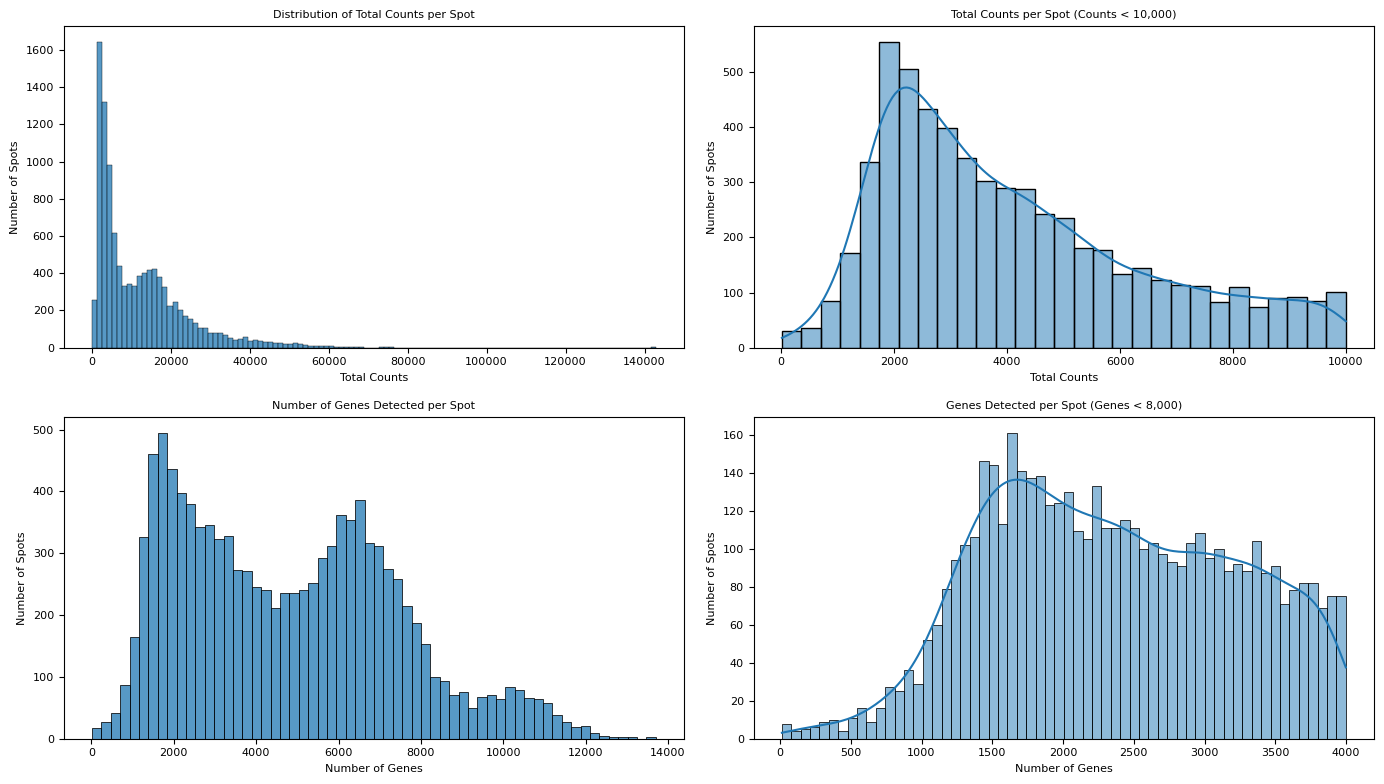

In [16]:
### view distribution of genes and cells  
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
### Adjust font sizes for all labels
label_fontsize = 12
title_fontsize = 14

### distribution of total counts per spot 
sns.histplot(adata.obs['total_counts'], kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Total Counts per Spot')
axs[0, 0].set_xlabel('Total Counts', )
axs[0, 0].set_ylabel('Number of Spots', )

### cell counts per spot less than 10,000 
sns.histplot(
    adata.obs['total_counts'][adata.obs['total_counts'] < 10000],
    kde=True,
    ax=axs[0, 1]
)
axs[0, 1].set_title('Total Counts per Spot (Counts < 10,000)')
axs[0, 1].set_xlabel('Total Counts', )
axs[0, 1].set_ylabel('Number of Spots', )

### distribution of genes per spot 
sns.histplot(
    adata.obs['n_genes_by_counts'],
    kde=False,
    bins=60,
    ax=axs[1, 0]
)
axs[1, 0].set_title('Number of Genes Detected per Spot')
axs[1, 0].set_xlabel('Number of Genes', )
axs[1, 0].set_ylabel('Number of Spots', )

### gene counts per spot less than 8,000 
sns.histplot(
    adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts'] < 4000],
    kde=True,
    bins=60,
    ax=axs[1, 1]
)
axs[1, 1].set_title('Genes Detected per Spot (Genes < 8,000)')
axs[1, 1].set_xlabel('Number of Genes', )
axs[1, 1].set_ylabel('Number of Spots', )

plt.tight_layout()
plt.show()

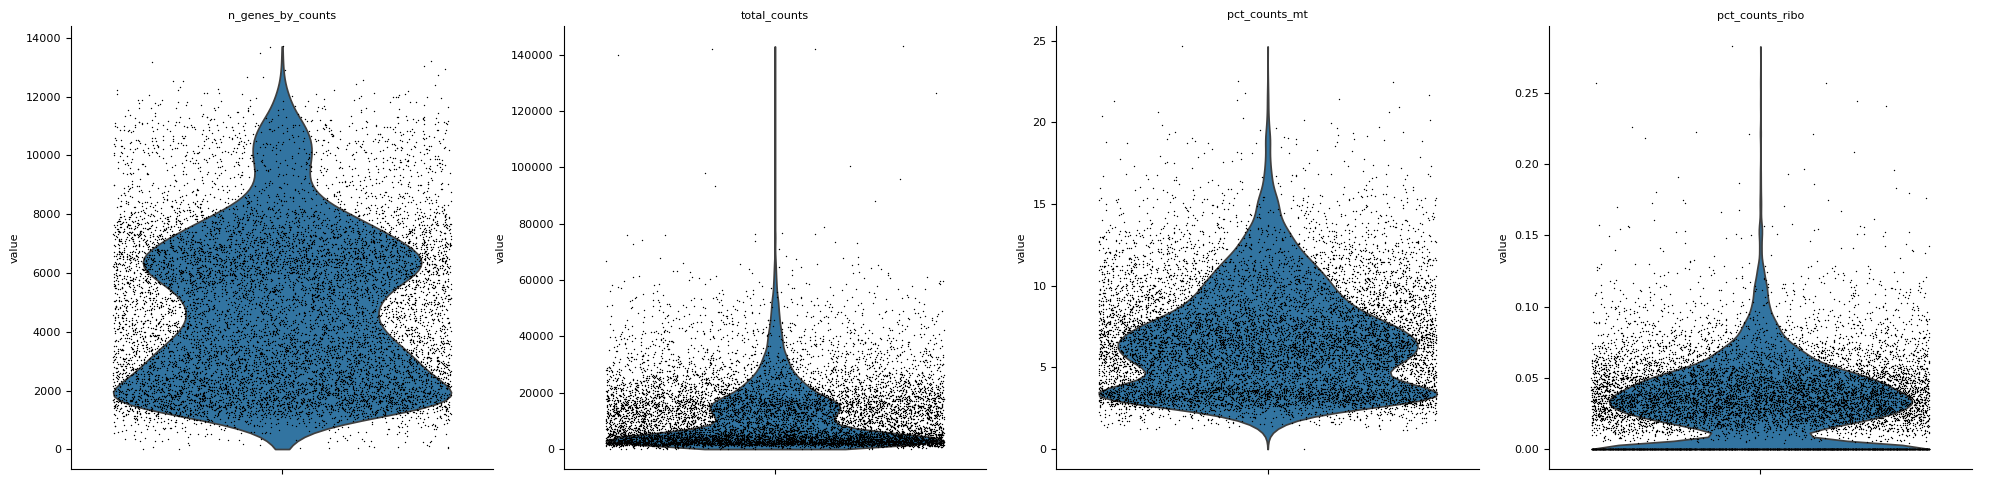

In [17]:
### violin plot fto view outliers
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4,
             multi_panel=True)

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
        perform quality control
    </p>
</div>

In [19]:
### filter out the genes that aren't in at least 5 cells 
### QC Params 
min_counts_per_cell = 30  # minimum total counts per cell
max_pct_mito = 20  # maximum allowed percentage for mitochondrial genes 
min_cells_per_gene = 5  # minimum number of cells a gene must be expressed in

### remove cells and genes with too low counts  
sc.pp.filter_cells(adata, min_counts=min_counts_per_cell)

### remove cells with high mito counts
### filters dead or stressed cells  
adata = adata[adata.obs['pct_counts_mt'] < max_pct_mito].copy()
pprint(f'Num cells after MT filter: {adata.n_obs}')

### remove lowly expressed genes 
### threshold is 5 
sc.pp.filter_genes(adata, min_cells=min_cells_per_gene)

filtered out 2 cells that have less than 30 counts


'Num cells after MT filter: 10861'

filtered out 14 genes that are detected in less than 5 cells


<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Normalization  
    </p>
</div>

In [27]:
### Normalisation Params 
target_total_counts = 1e4  # Normalise 
n_top_genes = 5000  # number of Highly variable genes to keep
### trying out keeping a fairly large numbner of genes
### to retaain as much info as possible

### Normalise the Visium counts to 10,000
sc.pp.normalize_total(adata, inplace=True, target_sum=target_total_counts)

### add log transformation 
sc.pp.log1p(adata)

### freeze the current state of adata as raw in adata 
adata.raw = adata

pprint(adata)

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 10861 × 18071
│   obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts'
│   var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
│   uns: 'spatial', 'log1p'
│   obsm: 'spatial'

In [36]:
### select highly variable genes 
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=n_top_genes)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


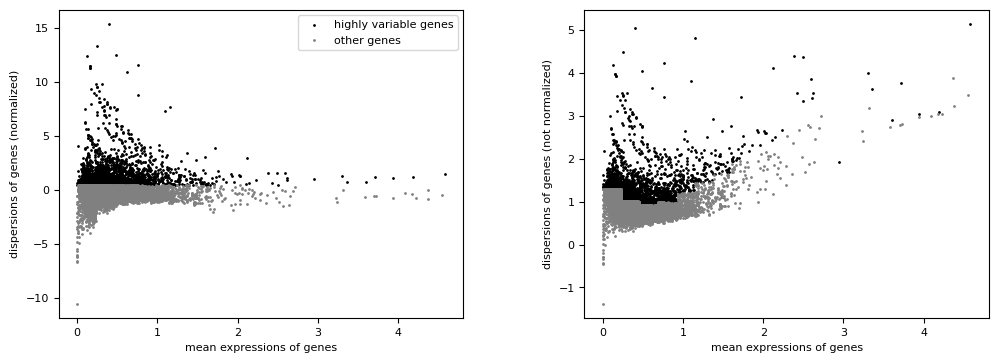

In [38]:
### view highly variable genes 
plt.rcParams['figure.figsize'] = (6, 4)
sc.pl.highly_variable_genes(adata)

In [40]:
### Get the subset of only the highly variable genes in the dataset  
### This keeps just the top 6000 genes that have been deemed highly variable 
adata = adata[:, adata.var.highly_variable]
pprint(f'Total genes left: {len(adata.var_names)}')
pprint(f'Total cells left: {len(adata.obs_names)}')

'Total genes left: 5000'

'Total cells left: 10861'

In [42]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']


C:\Users\alawo\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    sparse input is densified and may lead to high memory use
    finished (0:00:57)


<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
        Pricipal Component Analysis (PCA)
    </p>
</div>

In [45]:
### run pca to further reduce dimensionality 
sc.pp.pca(adata, random_state=42)

computing PCA
    with n_comps=50
    finished (0:00:08)


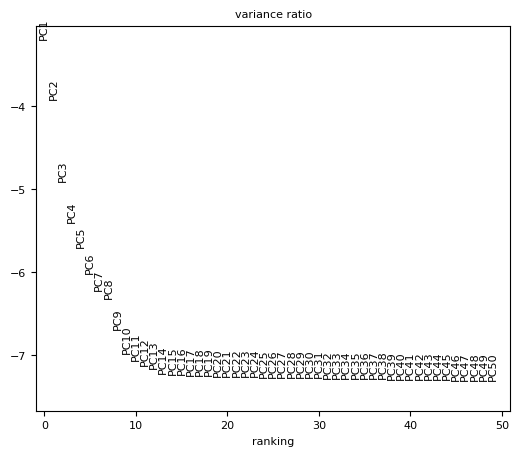

In [47]:
### Plot to show how much each principal component contributes to the data 

### Clustering params  
n_pcs = 50  # number of principal components to use 
n_neighbors = 30  # number of nearest neighbors for graph
cluster_key = 'clusters'

plt.rcParams['figure.figsize'] = (6, 5)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=n_pcs)

In [49]:
### Picking the "Elbow" component, this would be: PC15
### calculate the neighbors 
sc.pp.neighbors(adata, n_pcs=15)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      UMAP  
    </p>
</div>

In [52]:
### create umap from the data 
sc.tl.umap(adata)

### cluster the cells with louvain algorithm 
sc.tl.louvain(
    adata,
    key_added=cluster_key,
    flavor='igraph',
    directed=False,
    resolution=0.3
)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:05)
running Louvain clustering
    finished: found 17 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


In [54]:
### ensure cluster labels are categorical 
if adata.obs[cluster_key].dtype != 'category':
    adata.obs[cluster_key] = adata.obs[cluster_key].astype('category')

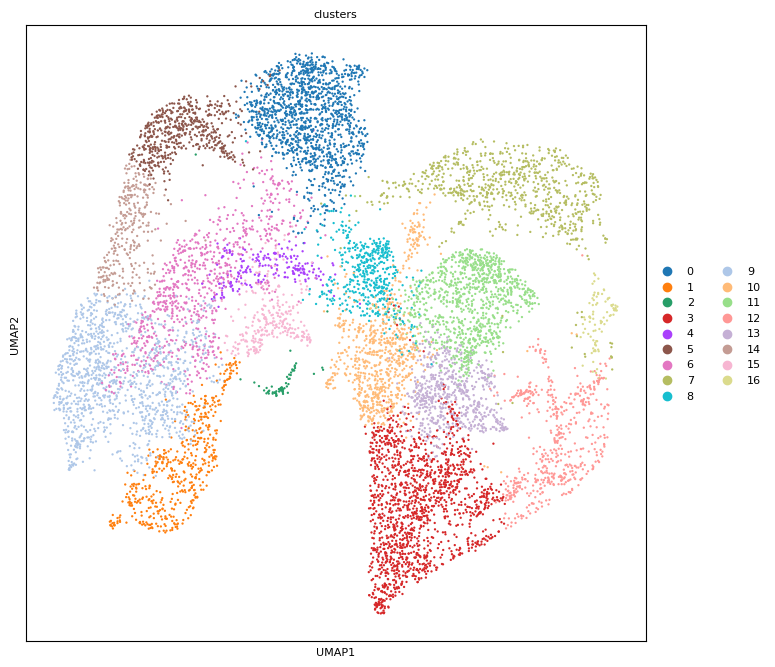

In [56]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.umap(adata, color=cluster_key, wspace=0.4)

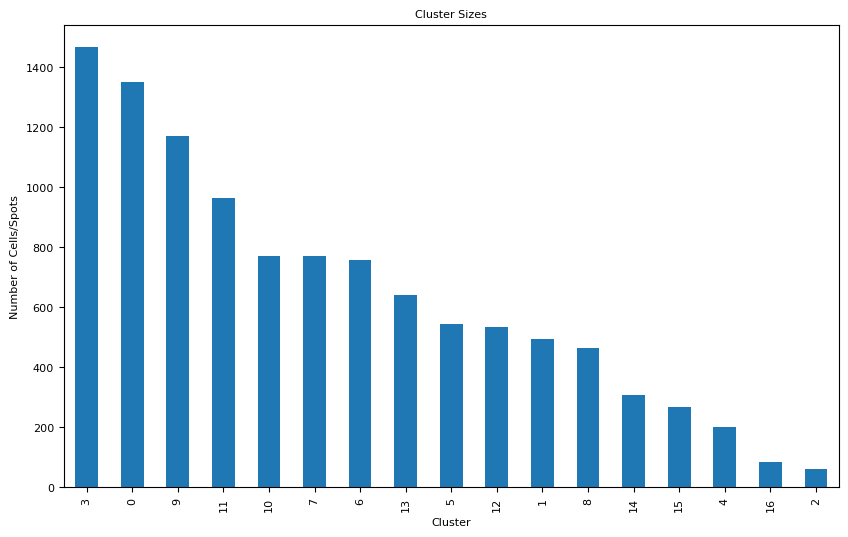

In [58]:
### view cluster counts 
plt.rcParams['figure.figsize'] = (10, 6)
adata.obs[cluster_key].value_counts().plot(kind='bar', title="Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Cells/Spots")
plt.show()

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Visualise spatial data  
    </p>
</div>

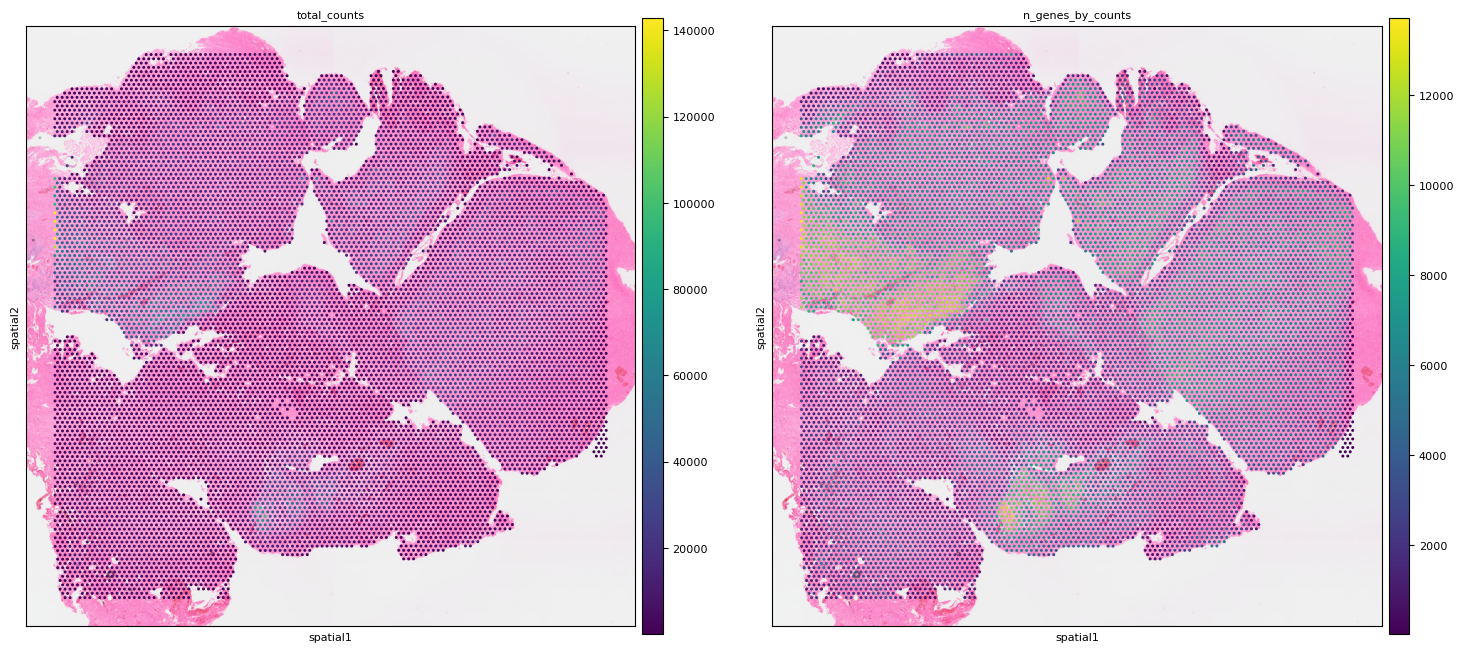

In [61]:
### visualisation in spatial coordinates 
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.spatial(adata, img_key='hires', color=['total_counts', "n_genes_by_counts"], palette='Viridis', na_color='Green')

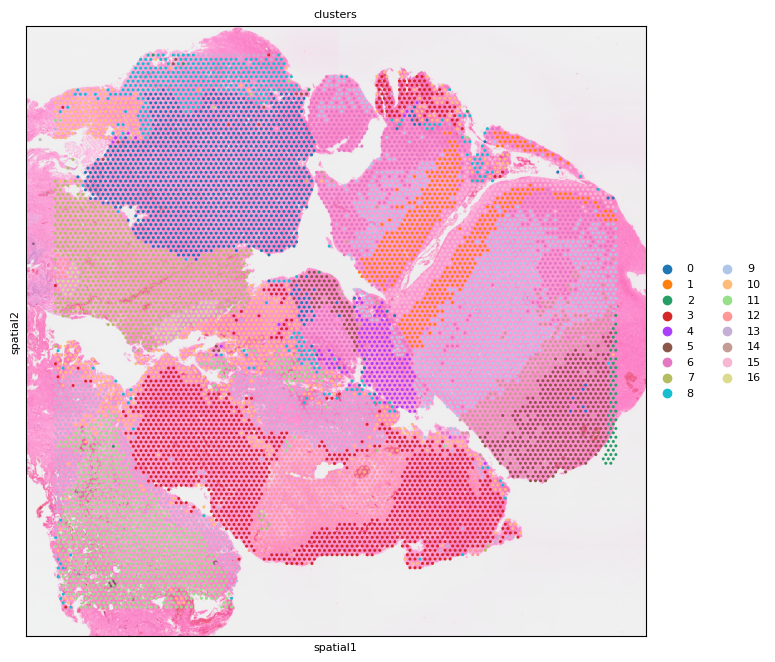

In [62]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.spatial(adata, img_key='hires', color='clusters', size=1)

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Rank gene groups  
    </p>
</div>

In [66]:
### rank the gene groups  
sc.tl.rank_genes_groups(adata, cluster_key)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


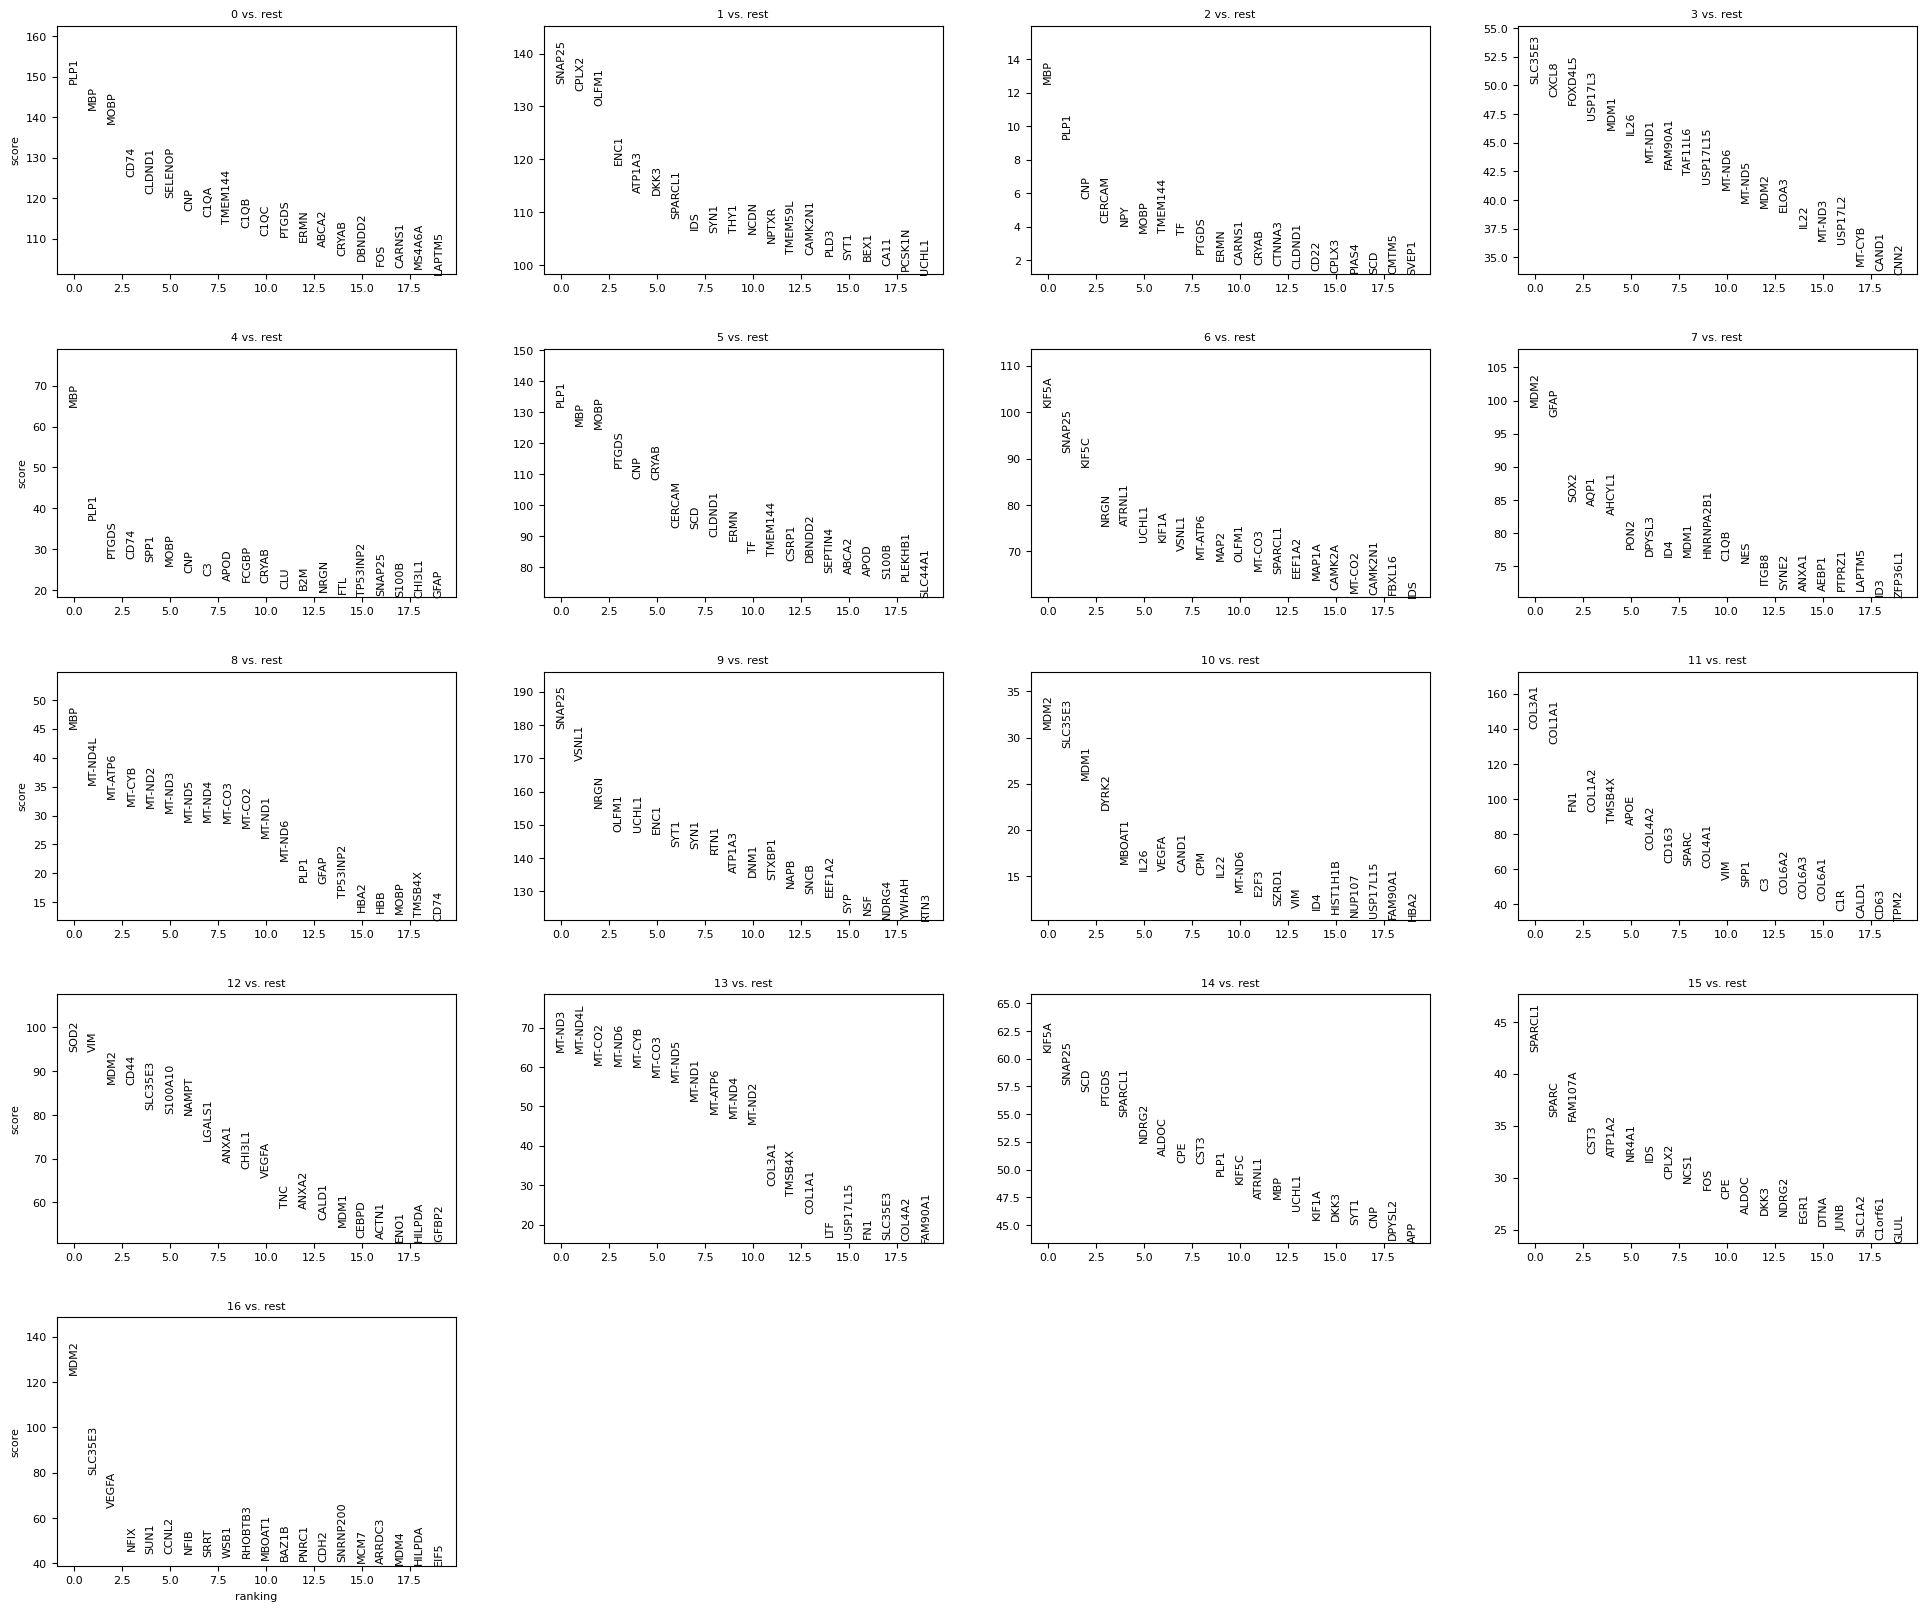

In [67]:
### plot the marker genes 
plt.rcParams['figure.figsize'] = (6, 4)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [68]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

group   names      scores  logfoldchanges     pvals  pvals_adj
0          0    PLP1  148.422989        3.995093  0.000000   0.000000
1          0     MBP  141.956940        3.651783  0.000000   0.000000
2          0    MOBP  138.393860        3.485369  0.000000   0.000000
3          0    CD74  125.273514        2.699035  0.000000   0.000000
4          0  CLDND1  121.144142        2.968295  0.000000   0.000000
...      ...     ...         ...             ...       ...        ...
297340    16    BMP4    2.159001        0.603980  0.033489   0.046653
297345    16  ZNF213    2.152875        0.504712  0.034029   0.047336
297348    16  MYL12B    2.151030        0.849303  0.034164   0.047506
297354    16  ZNF774    2.141598        0.557914  0.034943   0.048516
297358    16   IL5RA    2.137377        0.633842  0.035221   0.048862

[59384 rows x 6 columns]

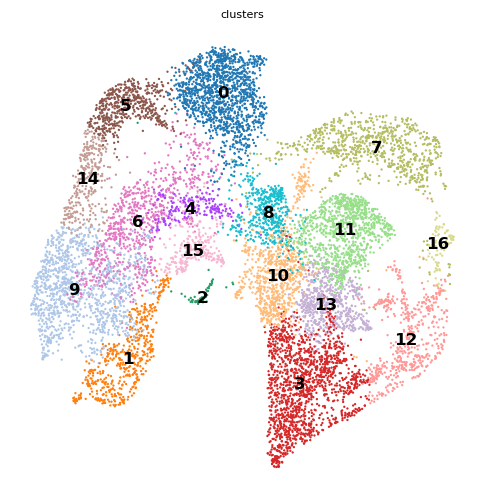

In [69]:
### plot the umap with the legend of the map on the image 
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=[cluster_key], frameon=False, legend_loc='on data')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 9


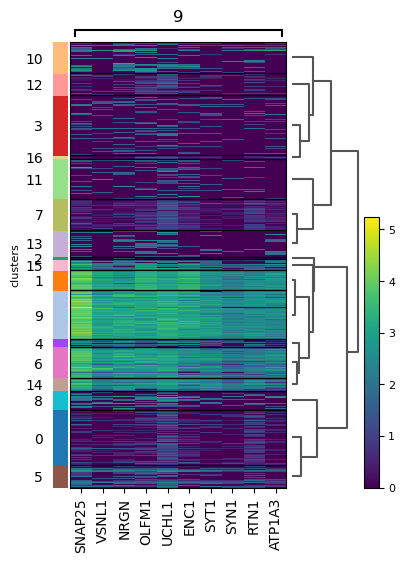

In [70]:
sc.pl.rank_genes_groups_heatmap(adata, groups='9', n_genes=10, groupby='clusters')

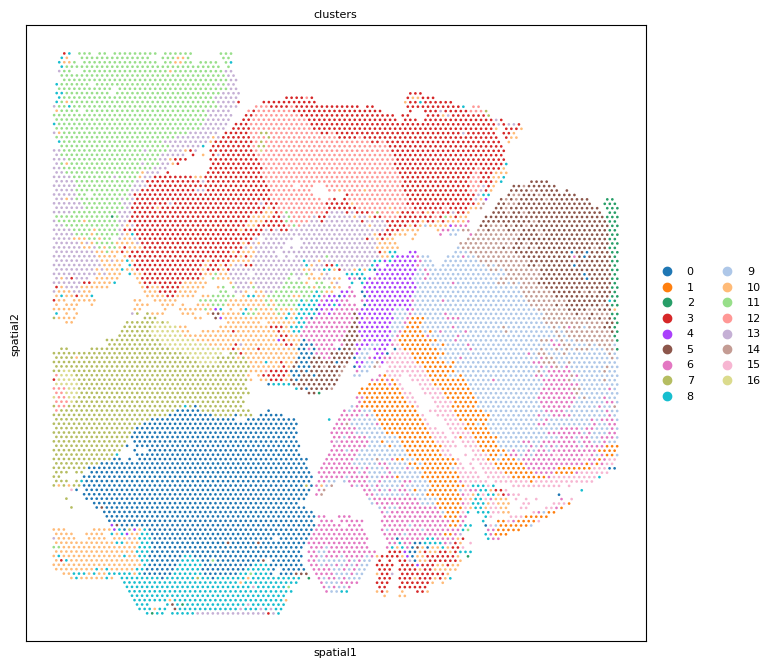

In [76]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.embedding(adata, basis='spatial', color='clusters', size=15)

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      View results after QC  
    </p>
</div>

In [79]:
### Results after quality control  
print(f'Shape of adata.X {adata.X.shape}')
print(f'Number of observations (samples): {adata.n_obs}')
print(f'Number of variables (Genes): {adata.n_vars}')

Shape of adata.X (10861, 5000)

Number of observations (samples): 10861

Number of variables (Genes): 5000

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Prepare dataset for flux prediction  
    </p>
</div>

In [82]:
### View adata at this point
pprint(adata)

AnnData object with n_obs × n_vars = 10861 × 5000
│   obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'clusters'
│   var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
│   uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'clusters', 'clusters_colors', 'rank_genes_groups', 'dendrogram_clusters'
│   obsm: 'spatial', 'X_pca', 'X_umap'
│   varm: 'PCs'
│   obsp: 'distances', 'connectivities'

In [84]:
### extract gene expressions matrix  
expression_matrix = adata.X

### Get gene and sample names  
gene_names = adata.var_names.tolist()
sample_names = adata.obs_names.tolist()

### create a dataframe with samples as rows and genes as columns  
df = pd.DataFrame(expression_matrix, index=sample_names, columns=gene_names)

### view dataframe 
df.sample(10)

PLEKHN1     PERM1     ISG15      AGRN    RNF223  \
TCCTCACGACCGTCCT-1 -0.314102 -0.352169 -0.591528  0.631924 -0.348401   
ATACCGCTGCTCTACA-1 -0.309756 -0.288596 -0.336570 -0.546939 -0.306136   
TACTCCGCCACTCAGG-1 -0.293406 -0.293529 -0.461896 -0.872337 -0.320434   
ATTCGGAAGCGTAACA-1 -0.310516 -0.344944  3.194617 -1.098185 -0.341825   
GCAACATTAACTACAT-1 -0.033983 -0.030888 -0.064604 -0.305723 -0.020197   
TCTACACTACAGTTAG-1 -0.166495 -0.186739 -0.639549 -0.636363 -0.184191   
GCCTGTTGTAATACCT-1 -0.330305 -0.342211 -0.455937 -0.804052 -0.341296   
ATAGTTAATAACAGGT-1 -0.286031  4.759254 -0.407191  2.058753 -0.302128   
ATTGTTCTGCGTGAGC-1 -0.097826 -0.077685 -0.533935 -0.139398 -0.099032   
TATTAGCGTGCTACTT-1 -0.330120 -0.325366 -0.388057 -0.658719 -0.335001   

                      TTLL10      SDF4   B3GALT6    SCNN1D    TAS1R3  ...  \
TCCTCACGACCGTCCT-1 -0.213104 -1.127004 -0.556888 -0.460276 -0.355231  ...   
ATACCGCTGCTCTACA-1 -0.168238  2.042045 -0.453517 -0.331894 -0.368387  ...   
TACTCCGCCACTCAGG-1 -0.180617 -0.868845 -0.500636 -0.371327 -0.340485  ...   
ATTCGGAAGCGTAACA-1 -0.208147 -1.093242 -0.550026 -0.452631 -0.352464  ...   
GCAACATTAACTACAT-1 -0.011409 -0.216465  0.141855 -0.378335 -0.059622  ...   
TCTACACTACAGTTAG-1 -0.112058 -0.080359  0.470429  2.181632 -0.197106  ...   
GCCTGTTGTAATACCT-1 -0.201286 -0.766128  3.126290 -0.406198 -0.382479  ...   
ATAGTTAATAACAGGT-1 -0.165771 -0.729523 -0.475504 -0.343006 -0.336795  ...   
ATTGTTCTGCGTGAGC-1 -0.046769  0.306443 -0.451326  0.651021 -0.131077  ...   
TATTAGCGTGCTACTT-1 -0.191071 -0.613246 -0.481505 -0.368318 -0.386476  ...   

                      PNMA6E       BGN      CCNQ     AVPR2    OPN1LW  \
TCCTCACGACCGTCCT-1 -0.235684 -1.070623  1.782791 -0.243129 -0.151029   
ATACCGCTGCTCTACA-1 -0.247231  2.146126  3.496641 -0.228668 -0.159084   
TACTCCGCCACTCAGG-1 -0.231137 -0.683791 -0.649089 -0.243228 -0.135338   
ATTCGGAAGCGTAACA-1 -0.233799 -1.015828 -0.675600 -0.239130 -0.150078   
GCAACATTAACTACAT-1 -0.030480 -0.327029 -0.553014 -0.015813 -0.014681   
TCTACACTACAGTTAG-1 -0.127207  0.959303  0.239510 -0.132047 -0.074530   
GCCTGTTGTAATACCT-1 -0.253934  1.785527 -0.695552 -0.240813 -0.168928   
ATAGTTAATAACAGGT-1 -0.228668 -0.458919 -0.649114 -0.232635 -0.135044   
ATTGTTCTGCGTGAGC-1 -0.085969 -0.982090  0.153040 -0.089113 -0.037164   
TATTAGCGTGCTACTT-1 -0.258426 -0.254470 -0.691813 -0.243244 -0.168889   

                       TKTL1      FLNA     TBL1Y    MT-ND2    MT-CO2  
TCCTCACGACCGTCCT-1 -0.192342  1.121789 -0.227607  1.306649  0.058208  
ATACCGCTGCTCTACA-1 -0.178965  2.668988 -0.249697 -2.479478 -0.805985  
TACTCCGCCACTCAGG-1 -0.191024 -0.399499 -0.227571 -0.096934  1.011103  
ATTCGGAAGCGTAACA-1 -0.190401 -0.782320 -0.226340 -1.011191  0.240133  
GCAACATTAACTACAT-1 -0.111200 -1.224387 -0.023838  0.824920  1.023084  
TCTACACTACAGTTAG-1 -0.154440 -0.035073 -0.118558 -0.672369 -0.327339  
GCCTGTTGTAATACCT-1 -0.185980  2.271824 -0.251705  0.438903 -0.378392  
ATAGTTAATAACAGGT-1 -0.185159 -0.158795 -0.227547 -1.833747  0.517615  
ATTGTTCTGCGTGAGC-1 -0.137656  0.134789 -0.081645  0.481705  0.748708  
TATTAGCGTGCTACTT-1 -0.185375  0.065756 -0.258733 -0.144009 -1.781654  

[10 rows x 5000 columns]

In [86]:
### get genes used for metabolic flux calculation 
with open('./data/human_brain_cancer/scFEA.human.genes.txt', 'r') as file:
    scfea_genes = set(line.strip() for line in file)

print(f'Number of scFEA genes: {len(scfea_genes)}')
genes_in_data = set(df.columns)

### get the genes common with scFEA list
common_genes = genes_in_data.intersection(scfea_genes)

print(f'Number of common genes: {len(common_genes)}')

Number of scFEA genes: 663

Number of common genes: 149

In [88]:
df_filtered = df[list(common_genes)]

print(f'Shape of d_filtered: {df_filtered.shape}')

Shape of d_filtered: (10861, 149)

<div style="background-color: #0a1a1a; color: #d3d3d3; padding: 10px; margin:10px 0; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <p style="color: #e6e6e6; text-align: center; font-family: 'Arial', sans-serif; text-transform: uppercase; letter-spacing: 2px; margin: 0;">
      Create Dataframe holding spatial data  
    </p>
</div>

In [91]:
### get spatial coords
spatial_coords = adata.obsm['spatial']
spatial_df = pd.DataFrame(spatial_coords, index=sample_names, columns=['x', 'y'])
print(f'Shape of df with spatial data: {spatial_df.shape}')
spatial_df

Shape of df with spatial data: (10861, 2)

x      y
AACAATCCGAGTGGAC-1  23655  11001
AACAATGTGCTCCGAG-1  43929  12561
AACAATTATCTGCGCC-1  55087  31826
AACACCAGCCTACTCG-1  22214  33752
AACACCATTCGCATAC-1  40472  26784
...                   ...    ...
TGTTGGCCTGTAGCGG-1  29334  30900
TGTTGGTGATTAGGTA-1  19087   9424
TGTTGGTGCGCACGAG-1  34818  35950
TGTTGGTGCGCTTCGC-1  38285  31841
TGTTGGTGCGGAATCA-1  30966  17314

[10861 rows x 2 columns]

In [93]:
### join filtered data with spatial data 
df_with_spatial = df_filtered.join(spatial_df)
print(f'Shape of df_with_spatial: {df_with_spatial.shape}')
df_with_spatial.sample(10)

Shape of df_with_spatial: (10861, 151)

HMGCS2     AGXT2      GCLC     CMPK2     TKTL2  \
AACACGCAGATAACAA-1 -0.162376 -0.129584 -0.748464 -0.392791 -0.170838   
TAATTGCGCCGTGCAA-1 -0.377409 -0.295881 -1.147511 -0.420653 -0.363081   
AACATCAAGGCTGGCT-1 -0.186768 -0.138118  0.777944 -0.434389 -0.187384   
ATTGCCGCTCTTGCTG-1 -0.354437 -0.278468  1.555085 -0.404703 -0.345028   
GTGCTCTGCAGTAACA-1  0.041990  0.058387 -0.139798  0.172197  0.016289   
GAAGCGTCAGTGTAGA-1 -0.253855 -0.177352 -1.018865 -0.340496 -0.270503   
ATGCATCAGGAGCTGA-1 -0.349463 -0.281386  1.625474 -0.424705 -0.334969   
TGTAGGCACTGACAAT-1 -0.156496 -0.122094 -0.355677  0.596208 -0.159435   
TATTCTCGTGGCCTTC-1 -0.186607  1.951191  0.139309  0.989632 -0.203594   
GGCCAACTATTGACAG-1 -0.046232 -0.032058 -1.011046  0.879723 -0.057639   

                      UGT2A1    SLC6A9     PYCR2      LAP3      PPAT  ...  \
AACACGCAGATAACAA-1 -0.165501 -0.464807  0.109615 -0.042094 -0.377074  ...   
TAATTGCGCCGTGCAA-1  4.197047  1.649492 -0.937813 -1.171730 -0.430010  ...   
AACATCAAGGCTGGCT-1 -0.148865  1.320946  0.782742 -1.196658  0.592509  ...   
ATTGCCGCTCTTGCTG-1 -0.308705 -0.743358 -0.873434 -1.076722  3.799179  ...   
GTGCTCTGCAGTAACA-1  0.054304 -1.216257 -0.276444 -0.633189 -0.414537  ...   
GAAGCGTCAGTGTAGA-1 -0.221624 -0.691301 -0.906741 -1.121562 -0.360796  ...   
ATGCATCAGGAGCTGA-1 -0.307042 -0.735298 -0.868081  1.326490 -0.423114  ...   
TGTAGGCACTGACAAT-1 -0.141156 -0.034971  0.600025 -0.426672 -0.412764  ...   
TATTCTCGTGGCCTTC-1 -0.143304 -1.060270 -0.193043  0.355628  0.997387  ...   
GGCCAACTATTGACAG-1 -0.045120 -0.859867  0.140426 -0.992596 -0.412140  ...   

                        AOC3    CYP8B1    CYP4B1    SLC2A3       GCK  \
AACACGCAGATAACAA-1 -0.204187 -0.196498 -0.153021  0.599622 -0.266353   
TAATTGCGCCGTGCAA-1 -0.260909 -0.359967 -0.242623 -0.684995 -0.429814   
AACATCAAGGCTGGCT-1  1.266497 -0.172598 -0.120545  0.582721 -0.263931   
ATTGCCGCTCTTGCTG-1 -0.278293 -0.352058 -0.244381 -0.613496 -0.415569   
GTGCTCTGCAGTAACA-1  0.052108  0.043785  0.990368  1.597488 -0.062006   
GAAGCGTCAGTGTAGA-1 -0.257075 -0.275631 -0.223002 -0.644920 -0.321356   
ATGCATCAGGAGCTGA-1  3.606273 -0.344227 -0.231436  1.658095 -0.415689   
TGTAGGCACTGACAAT-1 -0.133298 -0.163598 -0.118517 -0.668354 -0.250868   
TATTCTCGTGGCCTTC-1 -0.141948 -0.184313 -0.152193  0.249814 -0.252468   
GGCCAACTATTGACAG-1 -0.050235 -0.057418 -0.049515  0.327941 -0.156523   

                     CYP11B1      RRM2     AMACR      x      y  
AACACGCAGATAACAA-1 -0.133750  0.835672  0.635322  41019  25834  
TAATTGCGCCGTGCAA-1 -0.358079 -0.474277 -0.588877  19846  40387  
AACATCAAGGCTGGCT-1 -0.186436 -0.403364  0.223215  26762  13840  
ATTGCCGCTCTTGCTG-1 -0.330071  3.070752 -0.558488  24034  26799  
GTGCTCTGCAGTAACA-1  0.015143  0.190039 -0.102605  15626  19855  
GAAGCGTCAGTGTAGA-1 -0.249839 -0.414699 -0.498841  42120  32152  
ATGCATCAGGAGCTGA-1 -0.319274  1.966861  1.750714  30786  20156  
TGTAGGCACTGACAAT-1 -0.141651 -0.369466 -0.564146  48505  24249  
TATTCTCGTGGCCTTC-1 -0.202580 -0.410930 -0.557583  36280  36581  
GGCCAACTATTGACAG-1 -0.040250 -0.325846  0.035407  37903  14148  

[10 rows x 151 columns]

In [95]:
### transpose dataset to make it fit for scFEA prediction 
df_transposed = df_filtered.T
df_transposed

AACAATCCGAGTGGAC-1  AACAATGTGCTCCGAG-1  AACAATTATCTGCGCC-1  \
HMGCS2            -0.152119           -0.054265            6.993957   
AGXT2             -0.099235           -0.026533           -0.329657   
GCLC               1.027269           -0.627487           -0.756391   
CMPK2             -0.402275           -0.410056           -0.434537   
TKTL2             -0.164604           -0.072404           -0.366766   
...                     ...                 ...                 ...   
SLC2A3             1.069655           -0.155251           -0.430695   
GCK               -0.228634           -0.153521           -0.466315   
CYP11B1           -0.162787           -0.061276           -0.335575   
RRM2              -0.392715           -0.340627           -0.441679   
AMACR              0.277623            0.088456           -0.551370   

         AACACCAGCCTACTCG-1  AACACCATTCGCATAC-1  AACACCGAATGTCTCA-1  \
HMGCS2            -0.388036           -0.248320           -0.240297   
AGXT2             -0.322962           -0.189337           -0.180757   
GCLC              -0.885637           -1.017713            2.092302   
CMPK2             -0.439893           -0.399240           -0.377482   
TKTL2              4.441749           -0.250119           -0.247579   
...                     ...                 ...                 ...   
SLC2A3            -0.514373           -0.648487           -0.596190   
GCK                4.927911           -0.324425           -0.319845   
CYP11B1           -0.342924            2.157431           -0.223198   
RRM2              -0.452898           -0.410116           -0.399555   
AMACR             -0.572287            1.772207           -0.518576   

         AACACCTAAGCATTGC-1  AACACGACAACGGAGT-1  AACACGCAGATAACAA-1  \
HMGCS2            -0.373184           -0.236703           -0.162376   
AGXT2             -0.311984           -0.213242           -0.129584   
GCLC              -0.858133           -0.548884           -0.748464   
CMPK2             -0.439786           -0.436523           -0.392791   
TKTL2             -0.351029           -0.224622           -0.170838   
...                     ...                 ...                 ...   
SLC2A3             2.157740           -0.354370            0.599622   
GCK               -0.446235            1.241198           -0.266353   
CYP11B1           -0.327080           -0.177360           -0.133750   
RRM2              -0.444228           -0.359252            0.835672   
AMACR             -0.568005            0.795428            0.635322   

         AACACGGAACGAGTTA-1  ...  TGTTGCTCGATGTCTG-1  TGTTGGACGAAGGCGT-1  \
HMGCS2            -0.230848  ...           -0.271611           -0.056430   
AGXT2             -0.165107  ...           -0.214868           -0.042475   
GCLC               0.377072  ...           -0.010870            0.236199   
CMPK2             -0.363395  ...           -0.423544           -0.398606   
TKTL2             -0.243563  ...           -0.265032           -0.073430   
...                     ...  ...                 ...                 ...   
SLC2A3            -0.649411  ...           -0.648557           -0.559710   
GCK               -0.305148  ...           -0.346823           -0.175252   
CYP11B1           -0.223625  ...           -0.250813           -0.036950   
RRM2               1.493917  ...           -0.419831           -0.308237   
AMACR             -0.516230  ...           -0.571438            0.248466   

         TGTTGGAGCCGCGACG-1  TGTTGGATAGATCAGA-1  TGTTGGCCAATATGGC-1  \
HMGCS2            -0.240505           -0.233319           -0.281572   
AGXT2             -0.205483           -0.194956           -0.229064   
GCLC              -0.672191           -0.836864            1.078686   
CMPK2             -0.419284           -0.431800           -0.394720   
TKTL2             -0.233948           -0.225990           -0.278420   
...                     ...                 ...                 ...   
SLC2A3            -0.431164           -0

In [97]:
df_transposed.to_csv('scfea_input.csv')

### SAVE SPATIAL COORDS SEPARATELY 
spatial_df.to_csv('spatial_coordinates.csv')

In [101]:
adata.write_h5ad(filename='analysed_doc.h5ad')

In [ ]:
import platform

platform.python_version()

In [ ]:
!pip install SpaGCN 
!pip install scikit-learn

In [ ]:
import os, csv, re
import math
import SpaGCN as spg
from scipy.sparse import issparse
import random, torch
import warnings

In [ ]:
### Add x and y coord in the obs 
pprint(adata)

In [ ]:
adata.obs['x'] = spatial_df['x'].values
adata.obs['y'] = spatial_df['y'].values

In [ ]:
### read the metabolic fluxes 
metabolic_fluxes = pd.read_csv('flux/metabolic_flux.csv')
flux_df = metabolic_fluxes.set_index('Unnamed: 0')
flux_df.index.name = None
flux_df.sample(5)

In [ ]:
flux_balances = pd.read_csv('data/flux_balance.csv')

flux_balances.sample(5)

In [ ]:
adjacency = adata.obsp['connectivities']
distances = adata.obsp['distances']

In [ ]:
adata.write_h5ad(filename='analysed_doc.h5ad')